We want to see the distribution of machine stops during the day. Number of machine stops per hour of the day.

In [1]:
import pandas as pd

data = pd.read_csv('/Users/tyco/Desktop/MADS/sanovo/data/raw/HSTMachineError.csv')
data.head(5)

,MerId,MerType,MerDate,MerNumber,MerSubNumber,MerData1,MerData2,MerData3,MerData4,MerData5,MerMinId,MerText,MerDeviceType,MerDeviceNumber,MerPriority
0,11897185,7,2025-01-30 10:22:00.000,10,22,181.0,180.0,90.0,NaN,NaN,4620,NaN,0,0,0
1,11897186,21,2025-01-30 10:21:42.000,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0
2,11897187,23,2025-01-30 10:21:56.000,460,12,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0
3,11897188,21,2025-01-30 10:21:56.000,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0
4,11897189,23,2025-01-30 10:21:57.000,460,12,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0


In [9]:
data['MerDate'] = pd.to_datetime(data['MerDate'])  # Convert MerDate to datetime
data['Hour'] = data['MerDate'].dt.hour  # Extract hour from MerDate

data['Date'] = data['MerDate'].dt.date  # Extract date from MerDate
data['Machine_stops'] = data.apply(lambda x: 1 if x['MerType'] == 8 and x['MerNumber'] == 0 else 0, axis=1)


In [11]:
aggregated_data = data.groupby(['Date', 'Hour']).agg(
    machine_stops=('Machine_stops', 'sum')
).reset_index()

In [14]:
aggregated_data.head()

,Date,Hour,machine_stops
0,2025-01-30,10,7
1,2025-01-30,11,26
2,2025-01-30,12,47
3,2025-01-30,13,41
4,2025-01-30,14,45


In [32]:
aggregated_data_filtered = aggregated_data[aggregated_data['Date'] == pd.to_datetime('2025-02-04').date()]
aggregated_data_filtered.head()


,Date,Hour,machine_stops
110,2025-02-04,0,0
111,2025-02-04,1,0
112,2025-02-04,2,0
113,2025-02-04,3,0
114,2025-02-04,4,0


In [30]:
aggregated_data.describe()

,Hour,machine_stops
count,1600.000000,1600.000000
mean,11.505625,15.502500
std,6.899980,23.625333
min,0.000000,0.000000
25%,6.000000,0.000000
50%,11.500000,1.000000
75%,17.000000,26.000000
max,23.000000,220.000000


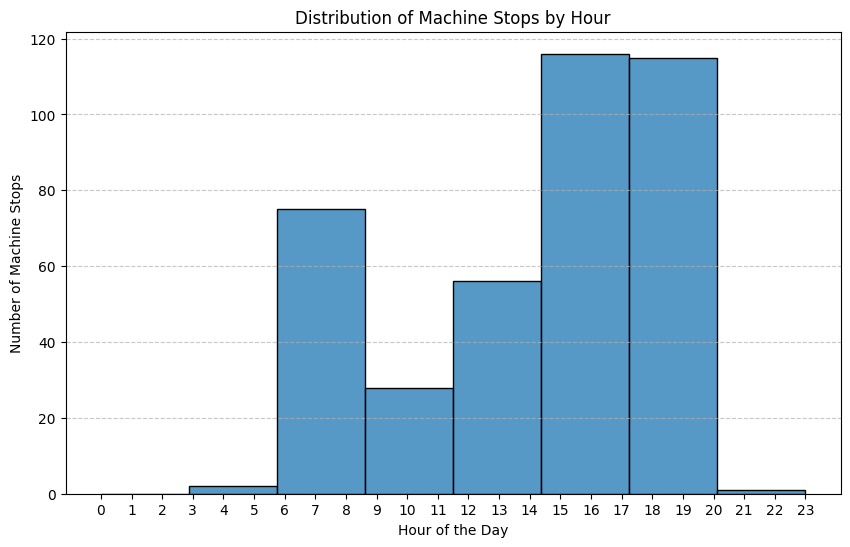

In [33]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=aggregated_data_filtered, x='Hour', weights='machine_stops', bins=8, kde=False)
plt.title('Distribution of Machine Stops by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Machine Stops')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

I want a correlation matrix for lane errors and machine stops

In [40]:
data.describe()

,MerId,MerType,MerDate,MerNumber,MerSubNumber,MerData1,MerData2,MerData3,MerData4,MerData5,MerMinId,MerText,MerDeviceType,MerDeviceNumber,MerPriority,Hour,Machine_stops
count,2.043727e+06,2.043727e+06,2043727,2.043727e+06,2.043727e+06,2.032845e+06,2.032845e+06,2.032845e+06,1788361.0,1788361.0,2043727.0,0.0,2.043727e+06,2.043727e+06,2043727.0,2.043727e+06,2.043727e+06
mean,1.297270e+07,2.098858e+01,2025-03-06 22:20:19.630968576,2.011751e+02,1.041297e+01,4.323632e+00,7.411623e+00,3.928654e+00,0.0,0.0,4620.0,NaN,1.664897e+00,2.559727e+00,0.0,1.305580e+01,1.213665e-02
min,1.189718e+07,7.000000e+00,2025-01-30 10:21:42,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,4620.0,NaN,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
25%,1.246198e+07,2.200000e+01,2025-02-20 17:35:53,9.800000e+01,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,4620.0,NaN,1.000000e+00,0.000000e+00,0.0,9.000000e+00,0.000000e+00
50%,1.297292e+07,2.200000e+01,2025-03-07 07:18:41,9.800000e+01,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,4620.0,NaN,1.000000e+00,0.000000e+00,0.0,1.300000e+01,0.000000e+00
75%,1.349026e+07,2.300000e+01,2025-03-19 14:43:58,4.140000e+02,1.400000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,4620.0,NaN,4.000000e+00,3.000000e+00,0.0,1.700000e+01,0.000000e+00
max,1.402797e+07,2.400000e+01,2025-04-08 21:10:01,5.110000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,0.0,0.0,4620.0,NaN,4.000000e+00,1.800000e+01,0.0,2.300000e+01,1.000000e+00
std,6.073034e+05,4.154068e+00,NaN,1.750004e+02,8.326031e+00,2.528108e+01,2.782464e+01,2.538590e+01,0.0,0.0,0.0,NaN,1.432623e+00,4.891655e+00,0.0,4.624365e+00,1.094959e-01


In [46]:
stops_class = data[(data['MerType'] == 8) & (data['MerNumber'] == 0)]
stops_class

,MerId,MerType,MerDate,MerNumber,MerSubNumber,MerData1,MerData2,MerData3,MerData4,MerData5,MerMinId,MerText,MerDeviceType,MerDeviceNumber,MerPriority,Hour,Date,Machine_stops
202,11897387,8,2025-01-30 10:25:46,0,2,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,10,2025-01-30,1
401,11897586,8,2025-01-30 10:31:04,0,2,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,10,2025-01-30,1
427,11897613,8,2025-01-30 10:31:15,0,2,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,10,2025-01-30,1
1203,11898389,8,2025-01-30 10:44:54,0,2,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,10,2025-01-30,1
1242,11898428,8,2025-01-30 10:46:11,0,2,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,10,2025-01-30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043276,14027523,8,2025-04-08 20:06:22,0,2,0.0,96.0,18.0,0.0,0.0,4620,NaN,1,0,0,20,2025-04-08,1
2043285,14027532,8,2025-04-08 20:06:32,0,2,0.0,96.0,18.0,0.0,0.0,4620,NaN,1,0,0,20,2025-04-08,1
2043293,14027540,8,2025-04-08 20:06:50,0,3,0.0,191.0,1.0,0.0,0.0,4620,NaN,1,0,0,20,2025-04-08,1
2043317,14027564,8,2025-04-08 20:07:30,0,3,0.0,191.0,1.0,0.0,0.0,4620,NaN,1,0,0,20,2025-04-08,1


In [47]:
stops_class['MerSubNumber'].value_counts()

MerSubNumber
2     19233
3      3002
11      742
12      657
1       537
0       184
4       177
8       148
6        47
9        45
10       24
7         8
Name: count, dtype: int64